In [4]:
#How to upload to Github
#https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb#:~:text=If%20you%20would%20like%20to,and%20follow%20the%20resulting%20prompts.
#https://www.dhs.gov/immigration-statistics/readingroom/LPR/LPRcounty
#https://www.migrationpolicy.org/content/explainer-how-us-legal-immigration-system-works
#https://www.cato.org/publications/policy-analysis/immigration-wait-times-quotas-have-doubled-green-card-backlogs-are-long#introduction
#https://www.cato.org/blog/only-46-percent-employment-based-green-cards-went-workers-2020
#https://www.pewresearch.org/hispanic/2017/06/29/mexican-lawful-immigrants-among-least-likely-to-become-u-s-citizens/


import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

file = "/content/drive/MyDrive/Personal/lpr_usa_counties_2019_top_200_d.csv"
df = pd.read_csv(file)
df["Admissions"].replace({"D": 0}, inplace=True)
df["Admissions"] = pd.to_numeric(df["Admissions"])
print(df)




      State of Residence County of Residence Country of Birth  \
0             California         Los Angeles      Afghanistan   
1             California         Los Angeles      Afghanistan   
2             California         Los Angeles      Afghanistan   
3             California         Los Angeles      Afghanistan   
4             California         Los Angeles      Afghanistan   
...                  ...                 ...              ...   
80194           Colorado                Weld          Vietnam   
80195           Colorado                Weld          Vietnam   
80196           Colorado                Weld          Vietnam   
80197           Colorado                Weld          Vietnam   
80198           Colorado                Weld          Vietnam   

             Major Class of Admission  Admissions  
0                   Diversity Program           0  
1               Family Preference 2nd           9  
2      Immediate Relatives -  Parents           9  
3      Imme

In [14]:
countries_all = df.groupby(['Country of Birth']).agg({'Admissions': 'sum'}).nlargest(n=20, columns=['Admissions']) 
print(countries_all)
df.groupby(['Country of Birth']).agg({'Admissions': 'sum'}).nlargest(n=20, columns=['Admissions']) 

                          Admissions
Country of Birth                    
Mexico                        121695
China, People's Republic       54738
Dominican Republic             45750
India                          44765
Cuba                           38812
Philippines                    34494
Vietnam                        32836
El Salvador                    23372
Jamaica                        17610
Colombia                       16508
Brazil                         16211
Haiti                          15290
Korea, South                   15147
Bangladesh                     13460
Venezuela                      13078
Nigeria                        12590
Honduras                       12319
Pakistan                       11112
Guatemala                      10120
Ecuador                         9392


,Admissions
Country of Birth,
Mexico,121695
"China, People's Republic",54738
Dominican Republic,45750
India,44765
Cuba,38812
Philippines,34494
Vietnam,32836
El Salvador,23372
Jamaica,17610


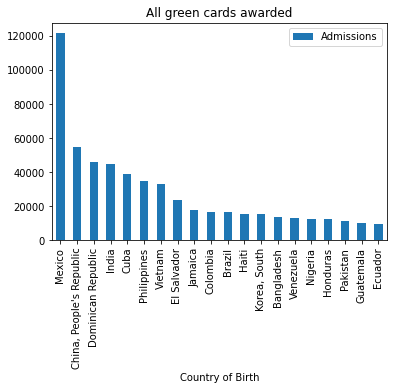

In [17]:
countries_all.plot.bar(y='Admissions',title= 'All green cards awarded')

In [79]:
df.groupby(['Country of Birth']).agg({'Admissions': 'sum'}) 
df.nlargest(n=20, columns=['Admissions'])



,State of Residence,County of Residence,Country of Birth,Major Class of Admission,Admissions
1521,Florida,Miami-Dade,Cuba,Refugee and Asylee Adjustments,16944
774,California,Los Angeles,Mexico,Immediate Relatives - Spouses,4301
9222,New York,Bronx,Dominican Republic,Family Preference 2nd,3919
772,California,Los Angeles,Mexico,Immediate Relatives - Parents,3648
3898,Texas,Harris,Mexico,Immediate Relatives - Spouses,3412
3522,Texas,Harris,Cuba,Refugee and Asylee Adjustments,2845
13746,Arizona,Maricopa,Mexico,Immediate Relatives - Spouses,2213
10174,California,San Diego,Mexico,Immediate Relatives - Spouses,2199
11911,Texas,Dallas,Mexico,Immediate Relatives - Spouses,2180
239,California,Los Angeles,"China, People's Republic",Refugee and Asylee Adjustments,2159


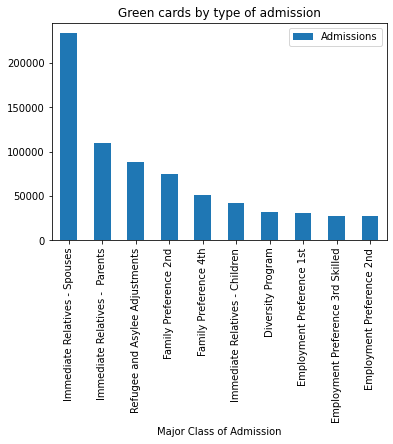

In [18]:
type_admission = df.groupby(['Major Class of Admission']).agg({'Admissions': 'sum'}).nlargest(n=10, columns=['Admissions']) 
type_admission.plot.bar(y='Admissions',title= 'Green cards by type of admission')

In [90]:
df.groupby(['Country of Birth','Major Class of Admission']).agg({'Admissions': 'sum'}).nlargest(n=20, columns=['Admissions']) 

Admissions
Country of Birth         Major Class of Admission                  
Mexico                   Immediate Relatives - Spouses        45308
Cuba                     Refugee and Asylee Adjustments       30991
Mexico                   Immediate Relatives -  Parents       27420
Dominican Republic       Family Preference 2nd                17824
Mexico                   Family Preference 2nd                13943
                         Other                                13435
Dominican Republic       Immediate Relatives - Spouses        11751
China, People's Republic Immediate Relatives - Spouses        11089
Vietnam                  Family Preference 4th                10761
Philippines              Immediate Relatives - Spouses        10049
China, People's Republic Immediate Relatives -  Parents        9007
Colombia                 Immediate Relatives - Spouses         8842
India                    Immediate Relatives -  Parents        8820
                         Immediate Relatives - Spouses         8226
Brazil                   Immediate Relatives - Spouses         8151
India                    Employment Preference 1st             8001
Jamaica                  Immediate Relatives - Spouses         7798
Vietnam                  Immediate Relatives - Spouses         7479
El Salvador              Immediate Relatives - Spouses         7353
Afghanistan              Other                                 7224

In [20]:
mexico = df.loc[df['Country of Birth'] == 'Mexico']
mexico.groupby(['Country of Birth','Major Class of Admission']).agg({'Admissions': 'sum'}).nlargest(n=10, columns=['Admissions']) 


Admissions
Country of Birth Major Class of Admission                     
Mexico           Immediate Relatives - Spouses           45308
                 Immediate Relatives -  Parents          27420
                 Family Preference 2nd                   13943
                 Other                                   13435
                 Immediate Relatives - Children           6899
                 Family Preference 4th                    4952
                 Family Preference 1st                    2205
                 Family Preference 3rd                    1828
                 Employment Preference 3rd Skilled        1438
                 Employment Preference 1st                1173

In [98]:
mexico.groupby(['Country of Birth','Major Class of Admission','County of Residence']).agg({'Admissions': 'sum'}).nlargest(n=10, columns=['Admissions']) 

Admissions
Country of Birth Major Class of Admission       County of Residence            
Mexico           Immediate Relatives - Spouses  Los Angeles                4301
                 Immediate Relatives -  Parents Los Angeles                3648
                 Immediate Relatives - Spouses  Harris                     3412
                                                Maricopa                   2213
                                                San Diego                  2199
                                                Dallas                     2180
                 Immediate Relatives -  Parents Harris                     1774
                 Immediate Relatives - Spouses  Cook                       1738
                                                El Paso                    1601
                 Immediate Relatives -  Parents Maricopa                   1491

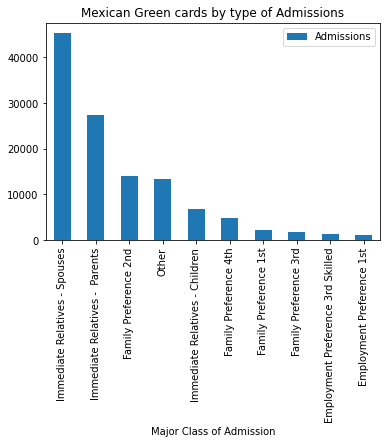

In [22]:
mexican_admissions = mexico.groupby(['Major Class of Admission']).agg({'Admissions': 'sum'}).nlargest(n=10, columns=['Admissions']) 
mexican_admissions.plot.bar(y='Admissions',title= 'Mexican Green cards by type of Admissions')

In [109]:
workers = df.loc[(df['Major Class of Admission'] == 'Employment Preference 1st') 
                            | (mexico['Major Class of Admission'] == 'Employment Preference 2nd')
                            | (mexico['Major Class of Admission'] == 'Employment Preference 3rd Skilled')
                            | (mexico['Major Class of Admission'] == 'Employment Preference 3rd Unskilled')
                            | (mexico['Major Class of Admission'] == 'Employment Preference 4th') ]
workers.groupby(['Country of Birth']).agg({'Admissions': 'sum'}).nlargest(n=20, columns=['Admissions']) 

,Admissions
Country of Birth,
India,8001
Mexico,4552
"China, People's Republic",4494
United Kingdom,2357
Brazil,2164
Canada,1331
"Korea, South",998
France,958
Venezuela,886


In [112]:
mexico_workers = workers.loc[df['Country of Birth'] == 'Mexico']
mexico_workers.groupby(['Country of Birth','County of Residence']).agg({'Admissions': 'sum'}).nlargest(n=10, columns=['Admissions']) 

Admissions
Country of Birth County of Residence            
Mexico           Oakland                     266
                 Harris                      250
                 King                        231
                 Los Angeles                 221
                 San Diego                   168
                 Montgomery                  161
                 Bexar                       158
                 Miami-Dade                  147
                 Santa Clara                 139
                 El Paso                     137

In [113]:
india_workers = workers.loc[df['Country of Birth'] == 'India']
india_workers.groupby(['Country of Birth','County of Residence']).agg({'Admissions': 'sum'}).nlargest(n=10, columns=['Admissions']) 


Admissions
Country of Birth County of Residence            
India            Santa Clara                1023
                 King                        552
                 Middlesex                   520
                 Alameda                     411
                 Washington                  256
                 Hudson                      226
                 San Diego                   185
                 Maricopa                    183
                 Cook                        166
                 Harris                      156

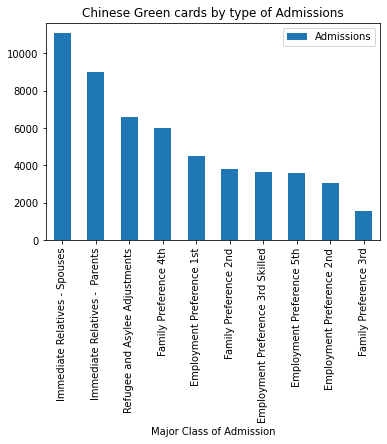

In [27]:
china = df.loc[df['Country of Birth'] == 'China, People\'s Republic']
china_admissions = china.groupby(['Major Class of Admission']).agg({'Admissions': 'sum'}).nlargest(n=10, columns=['Admissions']) 
china_admissions.plot.bar(y='Admissions',title= 'Chinese Green cards by type of Admissions')

In [117]:
china_workers = workers.loc[df['Country of Birth'] == 'China, People\'s Republic']
china_workers.groupby(['Country of Birth','County of Residence']).agg({'Admissions': 'sum'}).nlargest(n=10, columns=['Admissions']) 

Admissions
Country of Birth         County of Residence            
China, People's Republic Santa Clara                 557
                         Los Angeles                 462
                         King                        263
                         Orange                      227
                         Alameda                     189
                         Middlesex                   146
                         Harris                      134
                         Montgomery                  117
                         San Diego                   111
                         San Mateo                   107